In [393]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AffinityPropagation

In [67]:
def distance(one,two):
    return -(np.sum((one-two)**2))

In [242]:
def fill_r(responsibility,availability,similarity):
    for i in range(responsibility.shape[0]):
        for j in range(responsibility.shape[1]):
            responsibility[i,j] = similarity[i,j] - np.max(availability[i][list(filter(lambda a : a != j,
            [*range(responsibility.shape[1])]))] + similarity[i][list(filter(lambda a : a != j,
            [*range(responsibility.shape[1])]))]) 
    return

In [389]:
def fill_a(responsibility,availability):
    #diagonal
    for j in range(responsibility.shape[1]):
        for i in list(filter(lambda a : a != j,[*range(responsibility.shape[1])])):
            availability[j,j] += np.max([0, responsibility[i,j]])
    #off-diagonal
    for j in range(responsibility.shape[1]):
        for i in list(filter(lambda a : a != j,[*range(responsibility.shape[1])])):
            availability[i,j] = np.min([0, responsibility[j,j] + np.sum([np.max([0,
            responsibility[i_temp][j]]) for i_temp in list(filter(lambda a : a != i,[*range(responsibility.shape[1])]))])])
    return

In [390]:
def aff_prop(preference_dict,preference=-1):
    #preferences = np.array(list(preference_dict.values()))
    #names = list(preference_dict.keys())
    preferences = preference_dict
    #similarity = sklearn.metrics.pairwise_distances(preferences,metric=distance)
    similarity = pairwise_distances(preferences,metric='euclidean')
    #np.fill_diagonal(similarity,np.median(similarity))
    np.fill_diagonal(similarity,preference)
    responsibility = np.zeros((preferences.shape[0],preferences.shape[1]))
    availability = np.zeros((preferences.shape[0],preferences.shape[1]))
    criterion = np.zeros((preferences.shape[0],preferences.shape[1]))
    clusters = []
    clusters_old = ['old']
    while clusters != clusters_old:
        print('iter')
        clusters_old = clusters
        fill_r(responsibility,availability,similarity)
        fill_a(responsibility,availability)
        criterion = responsibility + availability
        clusters = [np.argmax(criterion[i]) for i in range(criterion.shape[0])]
        #clusters = [names[np.argmax(criterion[i])] for i in range(criterion.shape[0])]
    return clusters

In [391]:
prefs = {'Alice': [3,4,3,2,1],
         'Bob': [4,3,5,1,1],
         'Cary': [3,5,3,3,3],
         'Doug': [2,1,3,3,2],
         'Edna': [1,1,3,2,3]}

In [392]:
aff_prop(prefs)

TypeError: float() argument must be a string or a number, not 'dict'

In [274]:
X = np.array(list(prefs.values()))

In [364]:
X, clusters = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=1)

In [387]:
clustering.labels_ = aff_prop(X)

iter
iter
iter


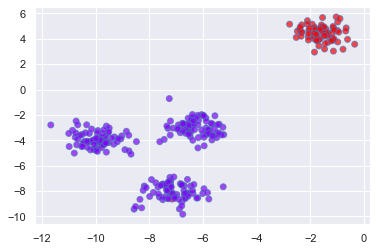

In [388]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

In [370]:
af = AffinityPropagation(preference=-50)
clustering = af.fit(X)

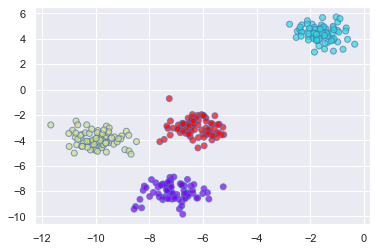

In [371]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')